# Name - Pushpendra dhakar
## Roll num - 19229
## Dept. -DSE
### Project name - Stock Market Prediction and analysis Using Machine Learning(ML) Algorithms

# Part 1 - Data preprocessing

## Load the dataset

In [2]:
import pandas as pd  #imports libaries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I am taking the dataset of Reliance company

In [3]:
df = pd.read_csv('Reliance.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


In [6]:
df = df.dropna() #remove rows containing NAN values
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


## shape of data

In [7]:
df.shape

(1232, 7)

In [8]:
df_close = df['Close']
df_close

0        456.000000
1        467.375000
2        473.424988
3        476.875000
4        483.850006
           ...     
1228    2084.550049
1229    1997.199951
1230    1980.000000
1231    1996.400024
1232    1993.250000
Name: Close, Length: 1232, dtype: float64

In [9]:
df_close.shape

(1232,)

## Understand the data

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,1036.035414,1048.479285,1023.015573,1035.164502,1024.471417,9.981743e+06
std,463.719976,469.906022,455.946191,462.301697,466.231636,7.603435e+06
min,459.000000,465.649994,444.049988,453.274994,434.061554,1.283997e+06
25%,551.925003,561.393768,546.000000,553.049988,540.720703,5.555522e+06
50%,959.099976,972.474976,946.675018,960.949982,946.843903,7.560520e+06
75%,1309.024963,1321.649963,1292.274963,1308.337494,1298.972321,1.140781e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.523004e+07


In [11]:
df.corr(method='pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999444,0.999528,0.998973,0.998959,0.395079
High,0.999444,1.000000,0.999293,0.999607,0.999613,0.410930
Low,0.999528,0.999293,1.000000,0.999541,0.999497,0.387160
Close,0.998973,0.999607,0.999541,1.000000,0.999977,0.401374
Adj Close,0.998959,0.999613,0.999497,0.999977,1.000000,0.402433
Volume,0.395079,0.410930,0.387160,0.401374,0.402433,1.000000


## Type of each attribute

In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

#  Part 2 - Data visualization 

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The columns Open and Close is showing the starting and final price at which the stock is traded on a particular day. 
High, Low  shows the maximum, minimum, and last price of the share for the day. 

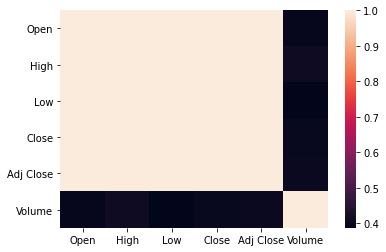

<Figure size 1440x1440 with 0 Axes>

In [14]:
corr_Matrix_plot = df.corr(method = 'pearson')     #correlation matrix
sns.heatmap(corr_Matrix_plot, annot= False)
plt.figure(figsize=(20, 20))
plt.show()

In [15]:
stock_data = df.copy()       ###pd_datetime covert python date time 
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
stock_data['Year'] = stock_data['Date'].dt.year
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,2015
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,2015
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,2015
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,2015
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,2015


# Scatter plot of Close Price vs Year

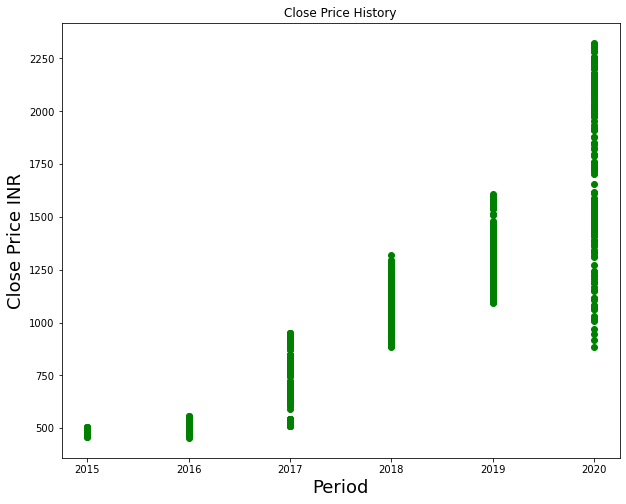

In [16]:
plt.figure(figsize=(10,8))
plt.title('Close Price History')
plt.scatter(x = stock_data['Year'], y = stock_data['Close'], color = 'green')
plt.xlabel('Period', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

# Line plot of close price vs year

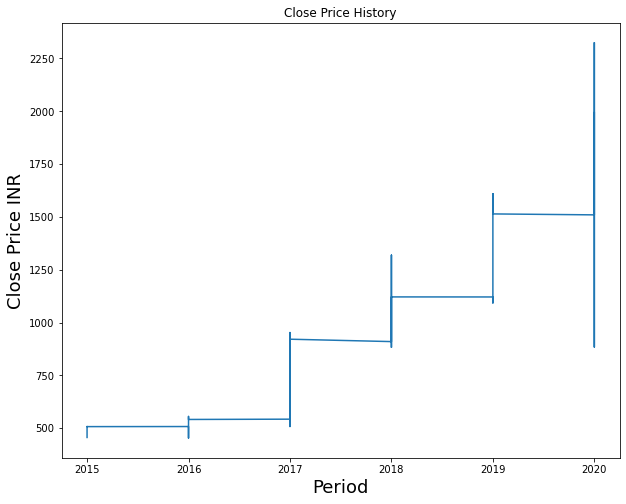

In [18]:
plt.figure(figsize=(10,8))
plt.title('Close Price History')
plt.plot(stock_data['Year'],stock_data['Close'])
plt.xlabel('Period', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

# Distribution of Volume Traded on day basis

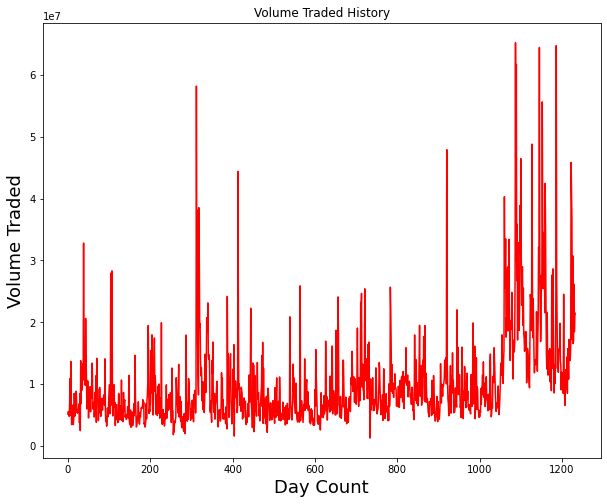

In [19]:
plt.figure(figsize=(10,8))
plt.title('Volume Traded History')
plt.plot(stock_data['Volume'], color = 'red')
plt.xlabel('Day Count', fontsize=18)
plt.ylabel('Volume Traded', fontsize=18)
plt.show()

In [20]:
df.skew()

Open         0.742755
High         0.740882
Low          0.738517
Close        0.735521
Adj Close    0.741291
Volume       3.054015
dtype: float64

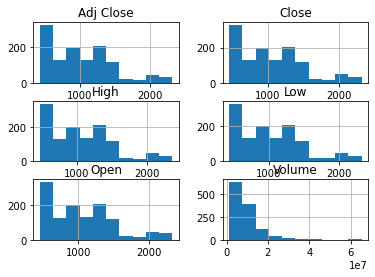

<Figure size 720x576 with 0 Axes>

In [21]:
#this is histogram graph
df.hist()      
plt.figure(figsize=(10,8))
plt.show()

Open            AxesSubplot(0.125,0.657941;0.227941x0.222059)
High         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Low          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Close           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Adj Close    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Volume       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

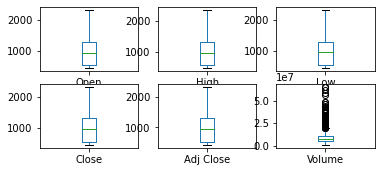

In [22]:
#boxes plot
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

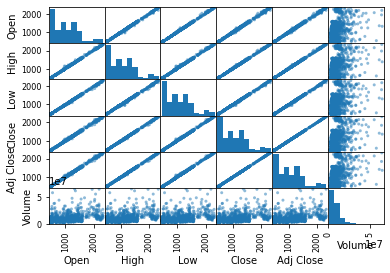

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
plt.figure(figsize=(16,8))

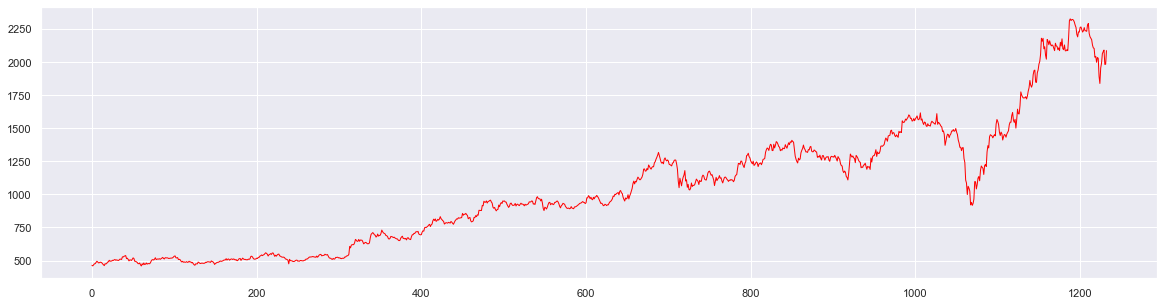

In [24]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='red')

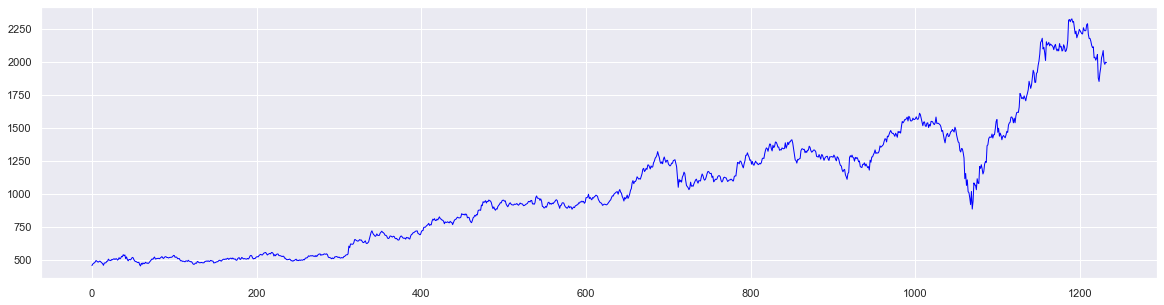

In [25]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Close'].plot(linewidth = 1,color='blue')

## Part 3 LSTM Model

#### Long Short Term Memory (LSTM) Network

long short term memory network is called LSTM .this is special kind of RNN.capable of learning long short term dependenices

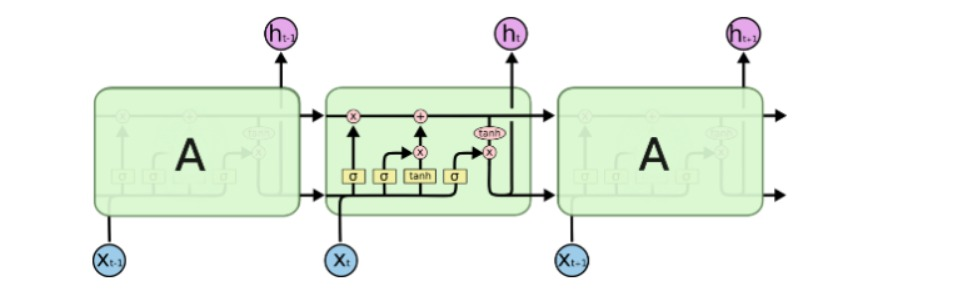

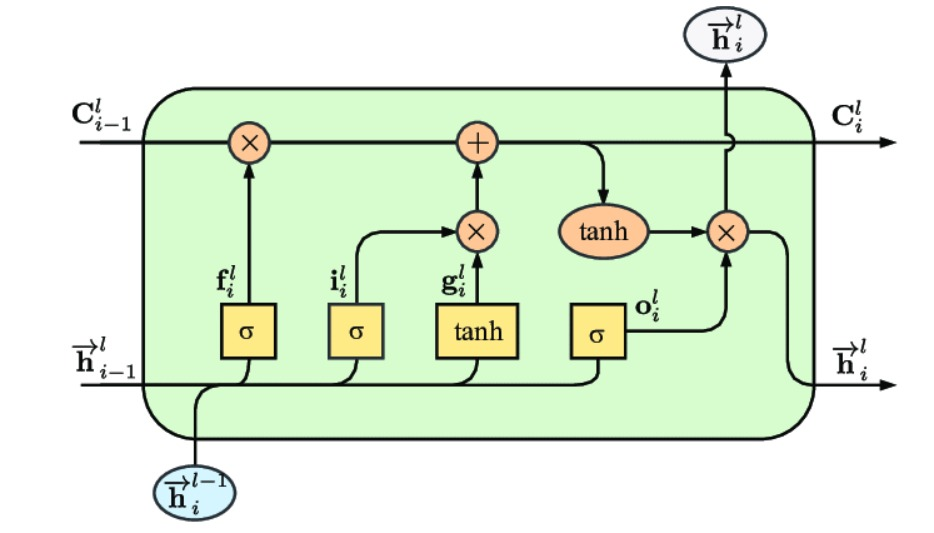

 LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))     ### transformeing value between 0 to 1
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [27]:
df_close.shape

(1232, 1)

In [28]:
df_close    # conerted in array 

array([[0.00145623],
       [0.00753497],
       [0.01076806],
       ...,
       [0.81587418],
       [0.82463827],
       [0.82295492]])

#### Split the data into train and test split

In [29]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size    #25%data will be used in test  size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [30]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]  #i=0,1,....99,100
        dataX.append(a)                                 ## this fuction can be used to create a time series dataset fron and one dimensional array
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [32]:
print(y_train)

[0.04227065 0.03493609 0.03596479 0.03537694 0.02948525 0.02949861
 0.03015325 0.02408786 0.0203471  0.02148268 0.01850343 0.01911798
 0.01835647 0.01667313 0.02045396 0.02030701 0.01839656 0.02304578
 0.01913135 0.01854351 0.01672657 0.01710064 0.01193037 0.00738802
 0.00626578 0.009058   0.01193037 0.01076806 0.01820952 0.01660633
 0.01370723 0.01257164 0.01327972 0.0141882  0.01289228 0.01295908
 0.01270524 0.01726097 0.01874391 0.01991957 0.01862367 0.02085476
 0.01863703 0.01826296 0.02235108 0.02152275 0.01975926 0.0197459
 0.01199717 0.01311941 0.01369387 0.01612538 0.01672657 0.01787552
 0.02141589 0.02312594 0.02173653 0.01919815 0.02296563 0.02587809
 0.02730759 0.02627888 0.02822942 0.02663959 0.02972572 0.03111515
 0.02666631 0.02893749 0.03104835 0.03139572 0.02846989 0.03201026
 0.02895086 0.02750798 0.02838973 0.02335307 0.02309923 0.02931157
 0.03278514 0.03317256 0.02594489 0.02873709 0.03453529 0.03162283
 0.02852333 0.02979252 0.02895086 0.02813589 0.02776183 0.03044

In [33]:
print(y_test.shape,x_test.shape)

(207,) (207, 100)


In [34]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)    #reshaping 

In [35]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [36]:
#Create the LSTM Model
LSTM_model = Sequential()    #model 
LSTM_model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))  #this input shape will be same x_train.shape[1]
LSTM_model.add(LSTM(50, return_sequences = True))
LSTM_model.add(LSTM(50))
LSTM_model.add(Dense(1))    # this is one output layer
LSTM_model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [37]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
LSTM_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size = 64, verbose = 1)
## we can see this ooutput.loss is decreasing 
## the validatioon loss is decreasing  0.0693 to 0.0041

Epoch 1/50
13/13 [==============================] - 7s 206ms/step - loss: 0.0196 - val_loss: 0.0693
Epoch 2/50
13/13 [==============================] - 2s 163ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 3/50
13/13 [==============================] - 2s 160ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 4/50
13/13 [==============================] - 2s 168ms/step - loss: 7.6663e-04 - val_loss: 0.0070
Epoch 5/50
13/13 [==============================] - 2s 169ms/step - loss: 5.4008e-04 - val_loss: 0.0095
Epoch 6/50
13/13 [==============================] - 2s 167ms/step - loss: 5.4741e-04 - val_loss: 0.0086
Epoch 7/50
13/13 [==============================] - 2s 168ms/step - loss: 5.2131e-04 - val_loss: 0.0073
Epoch 8/50
13/13 [==============================] - 2s 163ms/step - loss: 4.8143e-04 - val_loss: 0.0075
Epoch 9/50
13/13 [==============================] - 2s 160ms/step - loss: 4.7887e-04 - val_loss: 0.0079
Epoch 10/50
13/13 [==============================] - 2s 164ms/step - loss: 4

# Predicition result

In [39]:
#tain predict and test predict  using  lstm model _x train and x_test
train_predict = LSTM_model.predict(x_train)
test_predict = LSTM_model.predict(x_test)

In [40]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
from sklearn.metrics import mean_squared_error
import math

In [42]:
math.sqrt(mean_squared_error(y_train, train_predict))  #Calculate Train data RMSE performance metrics

930.3285562675666

In [43]:
math.sqrt(mean_squared_error(y_test, test_predict))  #Test Data RMSE

1691.5321055885054

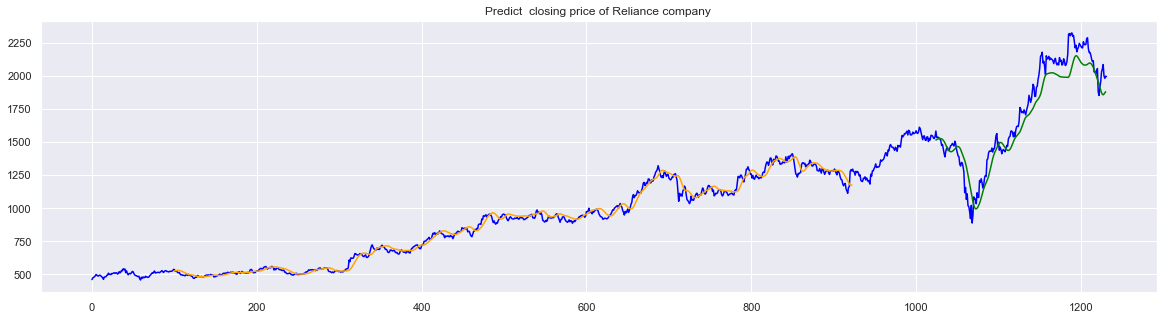

In [56]:
#Plotting
# this is our output graph 
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close),color='blue')
plt.plot(trainPredictPlot,color='orange')
plt.plot(testPredictPlot,color='green')
plt.title('Predict  closing price of Reliance company ')
plt.show()

### Predict the next 30 days Stock Price

In [57]:
len(test_data)

308

In [58]:
print(x_test.shape)

(207, 100, 1)


In [59]:
x_input = test_data[208:].reshape(1,-1) #reshape 
x_input.shape

(1, 100)

In [60]:
y_input= list(x_input)
y_input= y_input[0].tolist()

In [61]:
y_input

[0.6786148442512103,
 0.6684345941863691,
 0.686336826095296,
 0.6984943119438956,
 0.7132169193587631,
 0.7473647720911879,
 0.7322146219706863,
 0.7186142958550795,
 0.7326421641419253,
 0.7613926403780336,
 0.7918264084378552,
 0.7822072987554469,
 0.7431964650434568,
 0.7428758408795226,
 0.7793749791636058,
 0.7837570570297587,
 0.8113585712283222,
 0.8286996622204212,
 0.8574501384565296,
 0.9046638565916225,
 0.9100345523496547,
 0.9215240444703092,
 0.8782113049649991,
 0.8847310284911589,
 0.8624200379777949,
 0.8313716371322013,
 0.9070420190045232,
 0.8941363016245627,
 0.8982245017956487,
 0.9048242012716834,
 0.8906093732970752,
 0.8980641571155878,
 0.8947509344103346,
 0.8917850160729044,
 0.8873762574684672,
 0.8753791162999285,
 0.8899146336346584,
 0.8968617684052866,
 0.8784251415140039,
 0.8703023639675462,
 0.8777304018515868,
 0.8704359627131353,
 0.8999345395538338,
 0.885666219710282,
 0.8886320071209415,
 0.8696877311817746,
 0.8731880445015605,
 0.895071492843

In [62]:
stock_output=[]
n_steps=100
Future_30_day_pred= 30
i=0

while(i<30):
    
    if(len(y_input)>100):
        x_input=np.array(y_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = LSTM_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        y_input.extend(yhat[0].tolist())
        y_input=y_input[1:]
        stock_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = LSTM_model.predict(x_input, verbose=0)
        print(yhat[0])
        y_input.extend(yhat[0].tolist())
        print(len(y_input))
        stock_output.extend(yhat.tolist())
        i=i+1
    

print(stock_output)     #30 days predicted  

[0.7700067]
101
1 day input [0.66843459 0.68633683 0.69849431 0.71321692 0.74736477 0.73221462
 0.7186143  0.73264216 0.76139264 0.79182641 0.7822073  0.74319647
 0.74287584 0.77937498 0.78375706 0.81135857 0.82869966 0.85745014
 0.90466386 0.91003455 0.92152404 0.8782113  0.88473103 0.86242004
 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242  0.89060937
 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912 0.88991463
 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596 0.89993454
 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149 0.88646781
 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211 0.99743488
 0.98824331 0.99695397 1.         0.98621258 0.9899266  0.96328709
 0.93939953 0.94990047 0.92339443 0.93434952 0.942125   0.9575156
 0.9517976  0.94693455 0.93996067 0.93897212 0.96416879 0.95441608
 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465 0.92050875
 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546 0.84211296
 0.84499871 0.83268088 0.84093732 0

In [63]:
past_day = np.arange(1,101)   # based on past 100 days   
future_30_day_pred = np.arange(101,131)   #now we predict  next 30 days price

In [64]:
df3 = df_close.tolist()
df3.extend(stock_output)

In [65]:
len(df_close)     # Length of close column is 1232 

1232

Text(0.5, 1.0, 'Future 30 days closing price of Reliance company')

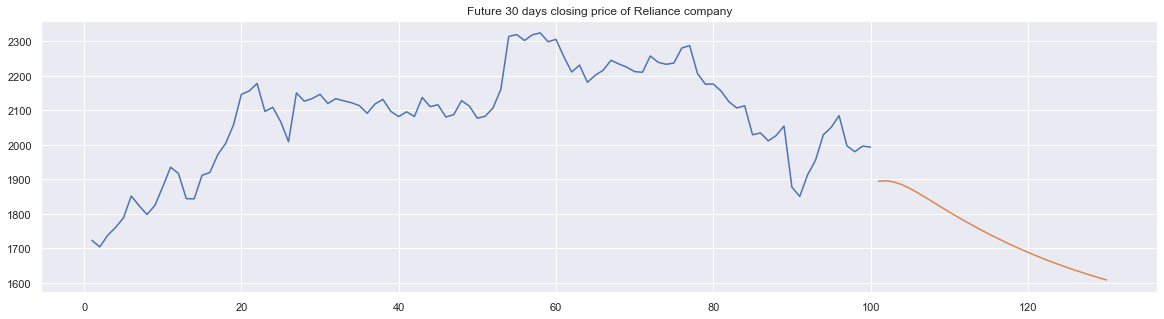

In [66]:
plt.plot(past_day, scaler.inverse_transform(df_close[1132:]))   #we predict  past 100 days 1232-1132=100
plt.plot(future_30_day_pred, scaler.inverse_transform(stock_output))
plt.title('Future 30 days closing price of Reliance company')

                                          Thank you